Task 2: Sentiment Analysis with NLP
Creating reviews dataset...
Reviews dataset saved to 'reviews_dataset.csv'

Performing sentiment analysis...
Preprocessing text...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Creating TF-IDF vectorizer and logistic regression model...
Training model...

Model Evaluation:
Accuracy: 0.6364

Classification Report:
              precision    recall  f1-score   support

    Negative       0.75      0.50      0.60         6
    Positive       0.57      0.80      0.67         5

    accuracy                           0.64        11
   macro avg       0.66      0.65      0.63        11
weighted avg       0.67      0.64      0.63        11

Confusion matrix saved to 'sentiment_confusion_matrix.png'


<ipython-input-1-f401b652e300>:192: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_positive, palette='Greens_r')
<ipython-input-1-f401b652e300>:197: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_negative, palette='Reds_r')


Feature importance visualization saved to 'sentiment_feature_importance.png'

Testing with example reviews:
Text: 'This product is amazing! I love it so much.'
Predicted sentiment: Positive (confidence: 0.64)

Text: 'Terrible experience. Would not recommend.'
Predicted sentiment: Negative (confidence: 0.56)

Text: 'It's okay, but not worth the price.'
Predicted sentiment: Negative (confidence: 0.54)


Task completed successfully!


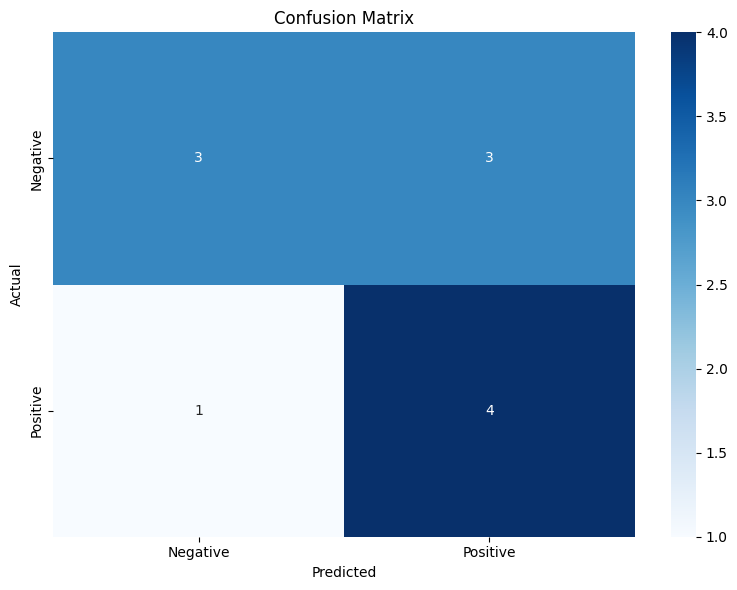

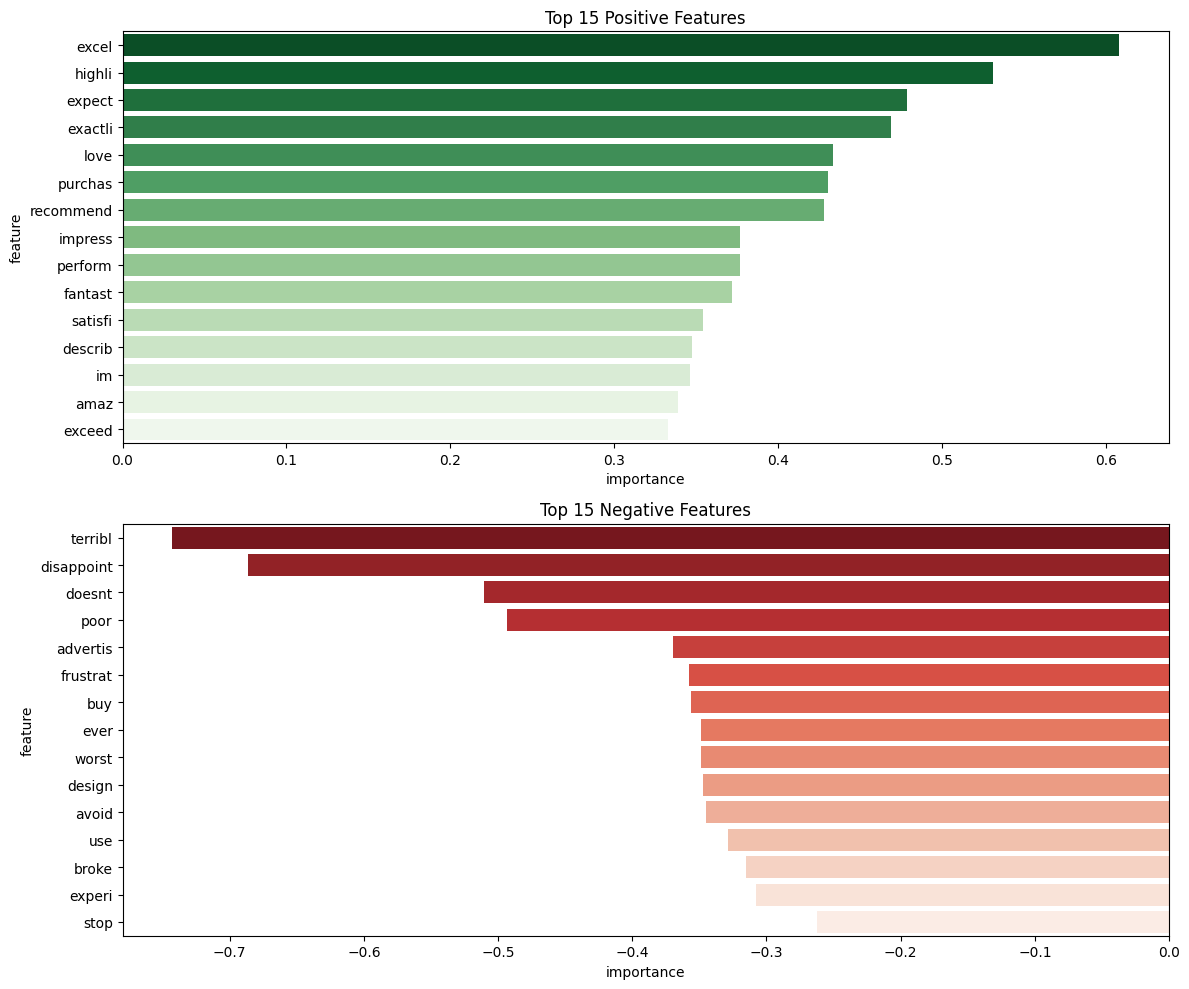

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Create a function to generate and save a sample reviews dataset
def create_reviews_dataset():
    print("Creating reviews dataset...")

    # Sample reviews with sentiment (1 for positive, 0 for negative)
    reviews_data = [
        ("This product exceeded my expectations. Highly recommend!", 1),
        ("I love this product! It works exactly as described.", 1),
        ("Terrible experience. The product broke after one use.", 0),
        ("Great value for money. Will buy again.", 1),
        ("Disappointed with the quality. Not worth the price.", 0),
        ("Amazing customer service and fast shipping.", 1),
        ("The product is okay but not as good as advertised.", 0),
        ("Absolutely love it! Best purchase I've made this year.", 1),
        ("Waste of money. Don't buy this product.", 0),
        ("Works perfectly. Very satisfied with my purchase.", 1),
        ("The product arrived damaged. Very disappointed.", 0),
        ("Excellent quality and durability. Highly satisfied.", 1),
        ("Not what I expected. The description is misleading.", 0),
        ("This is exactly what I needed. Very happy customer.", 1),
        ("Poor quality control. Had to return it immediately.", 0),
        ("Fantastic product! Exceeded all my expectations.", 1),
        ("The worst purchase I've ever made. Avoid at all costs.", 0),
        ("Great product, great price, fast delivery. Perfect!", 1),
        ("Doesn't work as advertised. Very frustrating experience.", 0),
        ("I'm impressed with the quality and performance.", 1),
        ("Broke within a week. Terrible quality.", 0),
        ("Absolutely perfect! Couldn't be happier with my purchase.", 1),
        ("Save your money and buy something else.", 0),
        ("Excellent product that delivers on all promises.", 1),
        ("Disappointing performance. Not recommended.", 0),
        ("I'm in love with this product! Works like a charm.", 1),
        ("Terrible design and poor functionality.", 0),
        ("Outstanding quality and value. Highly recommend.", 1),
        ("The product stopped working after a month.", 0),
        ("Best purchase I've made in years! Totally worth it.", 1),
        ("Defective product. Waste of time and money.", 0),
        ("Incredible performance and reliability. Very satisfied.", 1),
        ("Not worth the hassle. Look elsewhere.", 0),
        ("Exactly as described. Very happy with my purchase.", 1),
        ("Cheaply made and breaks easily. Avoid.", 0),
        ("Superb quality and excellent customer service.", 1),
        ("Doesn't do what it claims. Very disappointed.", 0),
        ("Perfect in every way! Couldn't ask for more.", 1),
        ("Terrible customer service and product quality.", 0),
        ("Amazing value for money. Highly recommended!", 1),
        ("The product is a complete failure. Don't waste your money.", 0),
        ("Exceptional quality and performance. Very impressed.", 1),
        ("Poorly designed and difficult to use.", 0),
        ("Absolutely love this product! Works perfectly.", 1),
        ("Worst purchase ever. Complete disappointment.", 0),
        ("Fantastic product that exceeds expectations.", 1),
        ("The quality is much lower than advertised.", 0),
        ("Incredible product! Worth every penny.", 1),
        ("Doesn't work properly. Very frustrating.", 0),
        ("Excellent purchase! Exactly what I needed.", 1),
        ("Poor quality and terrible customer service.", 0)
    ]

    # Create DataFrame
    reviews_df = pd.DataFrame(reviews_data, columns=['text', 'sentiment'])

    # Save to CSV
    reviews_df.to_csv('reviews_dataset.csv', index=False)
    print("Reviews dataset saved to 'reviews_dataset.csv'")
    return reviews_df

# Text preprocessing function
def preprocess_text(text):
    # Download NLTK resources if not already downloaded
    try:
        nltk.data.find('corpora/stopwords')
    except LookupError:
        nltk.download('stopwords')

    # Initialize stemmer and stopwords
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # Tokenize
    tokens = text.split()

    # Remove stopwords and stem
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)

# Main function for sentiment analysis
def sentiment_analysis():
    # Create dataset if it doesn't exist
    try:
        reviews_df = pd.read_csv('reviews_dataset.csv')
        print("Loaded existing reviews dataset")
    except FileNotFoundError:
        reviews_df = create_reviews_dataset()

    print("\nPerforming sentiment analysis...")

    # Preprocess the text
    print("Preprocessing text...")
    reviews_df['processed_text'] = reviews_df['text'].apply(preprocess_text)

    # Split data into training and testing sets
    X = reviews_df['processed_text']
    y = reviews_df['sentiment']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a pipeline with TF-IDF vectorization and logistic regression
    print("Creating TF-IDF vectorizer and logistic regression model...")
    sentiment_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('classifier', LogisticRegression(random_state=42, max_iter=1000))
    ])

    # Train the model
    print("Training model...")
    sentiment_pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = sentiment_pipeline.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")

    # Print classification report
    print("\nClassification Report:")
    target_names = ['Negative', 'Positive']
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig('sentiment_confusion_matrix.png', dpi=300)
    print("Confusion matrix saved to 'sentiment_confusion_matrix.png'")

    # Get feature importance
    tfidf_vectorizer = sentiment_pipeline.named_steps['tfidf']
    log_reg = sentiment_pipeline.named_steps['classifier']

    # Get feature names
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Get coefficients
    coefficients = log_reg.coef_[0]

    # Create a DataFrame for feature importance
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': coefficients
    })

    # Sort by absolute importance
    feature_importance['abs_importance'] = np.abs(feature_importance['importance'])
    feature_importance = feature_importance.sort_values('abs_importance', ascending=False)

    # Visualize top positive and negative features
    top_n = 15
    top_positive = feature_importance[feature_importance['importance'] > 0].head(top_n)
    top_negative = feature_importance[feature_importance['importance'] < 0].head(top_n)

    plt.figure(figsize=(12, 10))

    plt.subplot(2, 1, 1)
    sns.barplot(x='importance', y='feature', data=top_positive, palette='Greens_r')
    plt.title(f'Top {top_n} Positive Features')
    plt.tight_layout()

    plt.subplot(2, 1, 2)
    sns.barplot(x='importance', y='feature', data=top_negative, palette='Reds_r')
    plt.title(f'Top {top_n} Negative Features')
    plt.tight_layout()

    plt.savefig('sentiment_feature_importance.png', dpi=300, bbox_inches='tight')
    print("Feature importance visualization saved to 'sentiment_feature_importance.png'")

    # Test with some example reviews
    print("\nTesting with example reviews:")
    examples = [
        "This product is amazing! I love it so much.",
        "Terrible experience. Would not recommend.",
        "It's okay, but not worth the price."
    ]

    for example in examples:
        processed_example = preprocess_text(example)
        prediction = sentiment_pipeline.predict([processed_example])[0]
        sentiment = "Positive" if prediction == 1 else "Negative"
        probability = sentiment_pipeline.predict_proba([processed_example])[0]
        confidence = probability[1] if prediction == 1 else probability[0]

        print(f"Text: '{example}'")
        print(f"Predicted sentiment: {sentiment} (confidence: {confidence:.2f})\n")

    return sentiment_pipeline

if __name__ == "__main__":
    print("Task 2: Sentiment Analysis with NLP")
    print("==================================")
    model = sentiment_analysis()
    print("\nTask completed successfully!")